<a href="https://colab.research.google.com/github/Koush98/Codespaze/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**House Price Prediction Model**

###**Description:**
Developing a regression model to predict House Price based
on others features (area,bedrooms,bathrooms,parking,furnishingstatus) data. This helps us in predicting house price based on differrent features.

**Tasks:**

▪ Preprocessing data (handling missing values, encoding categorical
variables).

▪ Training regression models (e.g., linear regression, random forest).

▪ Evaluating model performance and make predictions.

In [72]:
url="https://raw.githubusercontent.com/Koush98/Codespaze/main/Housing.csv"

In [73]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
df=pd.read_csv(url)

In [75]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
# Describing statistics of the data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### **Description:**

###### We can see our data set has two continious features (price and area) where others are categorical features. In the categorical features we have some numerical values in(bedrooms,bathrooms,stories, and parking) and we also have some boolean values(yes,no) in (mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus). we will create differrent varaible to store differrent features.

In [77]:
# Creating different variable to store same type features.
cf=df[["price","area"]] #continious features
nf=df[["bedrooms", "bathrooms", "stories", "parking"]] # numerical features
of=df[["mainroad","guestroom","basement","hotwaterheating","airconditioning",
"prefarea","furnishingstatus",
"airconditioning"]]  # ordidnal features

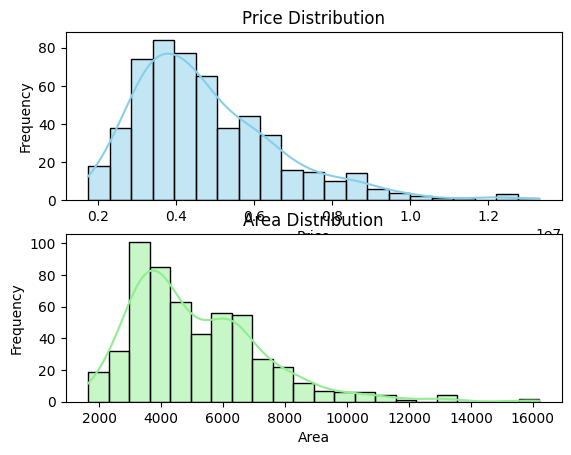

In [80]:
# First histogram for price
plt.subplot(2, 1, 1)
sns.histplot(df["price"], kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Second histogram for area
plt.subplot(2, 1, 2)
sns.histplot(df["area"], kde=True, color='lightgreen')
plt.title('Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')

plt.show()

##### **Remarks**

We can see both continious features(price,area) are following normal distribution and most of the price are in between (0.3-0.5)le+06 and most of the area are in between(3000-5000)square feet

In [113]:
bedrooms_counts = df['bedrooms'].value_counts()
bathrooms_counts = df['bathrooms'].value_counts()
parking_counts = df['parking'].value_counts()
furnishing_counts = df['furnishingstatus'].value_counts()
stories_counts = df['stories'].value_counts()

print("Bedroom Counts:")
print(bedrooms_counts)
print("\nBathroom Counts:")
print(bathrooms_counts)
print("\nParking Counts:")
print(parking_counts)
print("\nFurnishing Counts:")
print(furnishing_counts)
print("\nStiories Counts:")
print(stories_counts)


Bedroom Counts:
bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

Bathroom Counts:
bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

Parking Counts:
parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64

Furnishing Counts:
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

Stiories Counts:
stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64


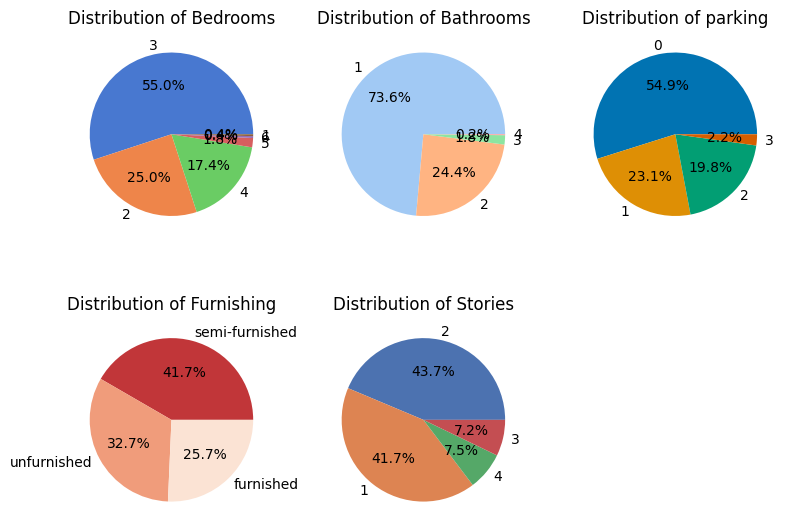

In [122]:
# Ploting the pie chart for Bedrooms
plt.figure(figsize=(8, 6))

plt.subplot(2, 3, 1)
plt.pie(bedrooms_counts, labels=bedrooms_counts.index, autopct='%1.1f%%', colors=sns.color_palette("muted"))
plt.title("Distribution of Bedrooms")

# Ploting the pie chart for Bathrooms

plt.subplot(2, 3, 2)
plt.pie(bathrooms_counts, labels=bathrooms_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Distribution of Bathrooms")


# Ploting the pie chart for Parkings

plt.subplot(2, 3, 3)
plt.pie(parking_counts, labels=parking_counts.index, autopct='%1.1f%%', colors=sns.color_palette("colorblind"))
plt.title("Distribution of parking")

# Ploting the pie chart for B

plt.subplot(2, 3, 4)
plt.pie(furnishing_counts, labels=furnishing_counts.index, autopct='%1.1f%%', colors=sns.color_palette("RdBu"))
plt.title("Distribution of Furnishing")


plt.subplot(2, 3, 5)
plt.pie(stories_counts, labels=stories_counts.index, autopct='%1.1f%%', colors=sns.color_palette("deep"))
plt.title("Distribution of Stories")

plt.tight_layout()
plt.show()

### ***Remarks***



1.  55% of houses having 3 bedrooms and 25% having 2 bedrooms.
2.  73.6% of houses having 1 bathroom. where 0.3% having 4
    bathrooms.
3.  55% of houses having no parking lots where 2.2% having 3    parkinglots.  
4.  There is little differrence in furninshed and saemi-furnished
    but most of the houses are semi-furninshed.
5.   There is little differrence in 2 stories and 3 stories
    but most of the houses are 2 stories and 7.5% are 4 stories.

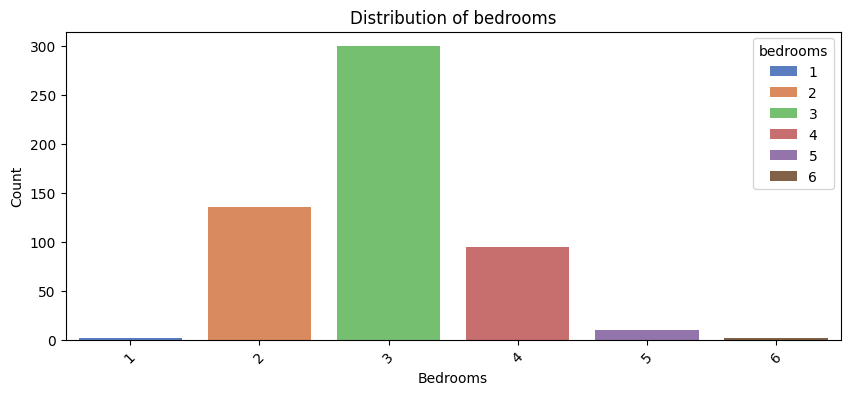

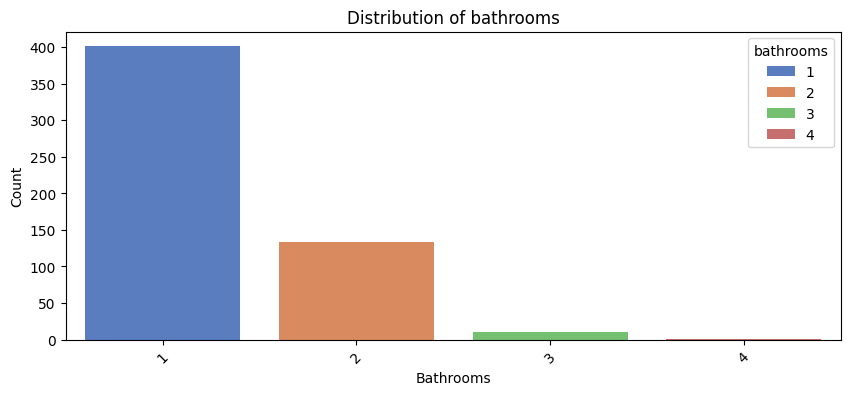

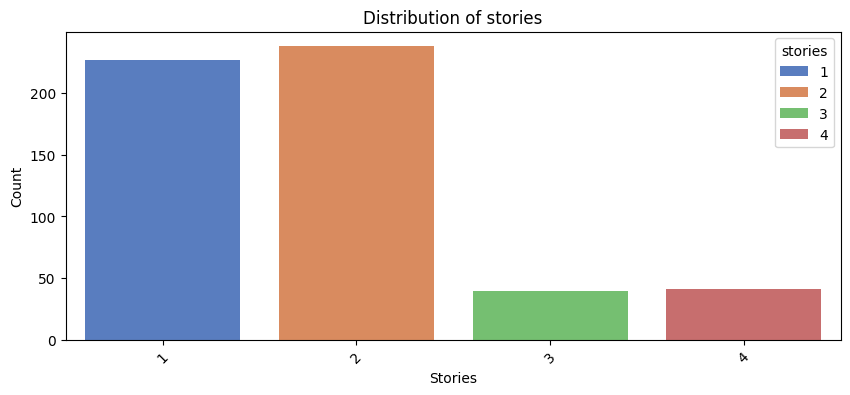

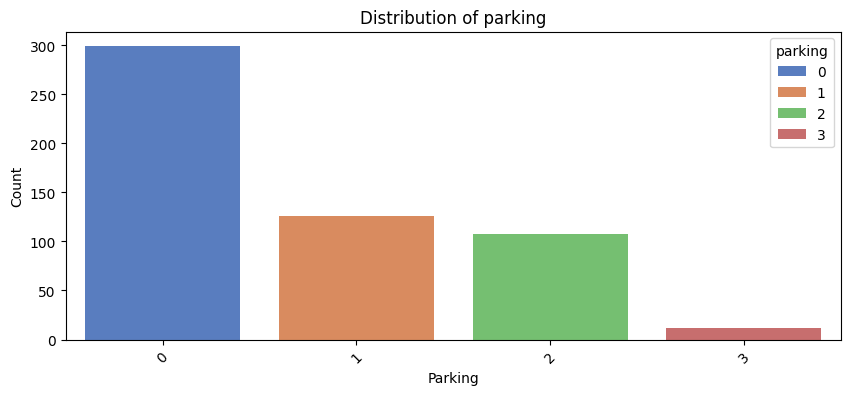

In [71]:
# Plot count plots for each categorical feature

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
cp = sns.countplot(x=df["bedrooms"], data=df,hue=column,legend=True,palette="muted")
cp.set_title(f'Distribution of {column}')
cp.set_xlabel(column.capitalize())
cp.set_ylabel("Count")

plt.show()

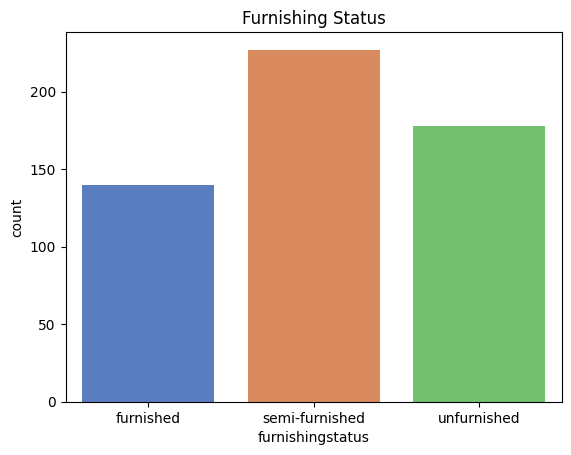

In [57]:
sns.countplot(x=df["furnishingstatus"],hue="furnishingstatus",data=df, palette="muted")
plt.title("Furnishing Status")
plt.show()

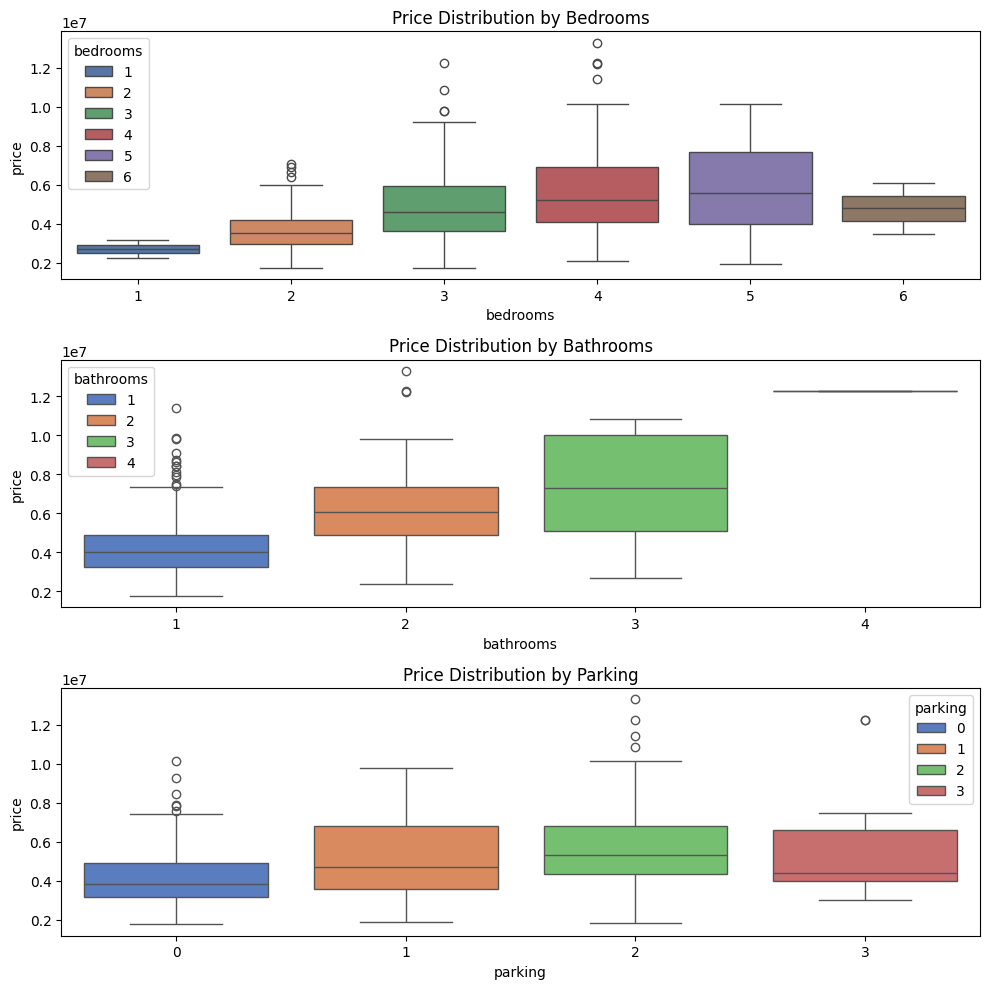

In [51]:
plt.figure(figsize=(10, 10))  # Set the figure size

# First subplot: Bedrooms vs. Price
plt.subplot(3, 1, 1)  # (1 row, 2 columns, 1st plot)
sns.boxplot(x="bedrooms", y="price", data=df,hue="bedrooms", palette="deep")
plt.title("Price Distribution by Bedrooms")

# Second subplot: Bathrooms vs. Price
plt.subplot(3, 1, 2)  # (1 row, 2 columns, 2nd plot)
sns.boxplot(x="bathrooms", y="price", data=df,hue="bathrooms", palette="muted")
plt.title("Price Distribution by Bathrooms")

# Second subplot: Bathrooms vs. Price
plt.subplot(3, 1, 3)  # (1 row, 2 columns, 2nd plot)
sns.boxplot(x="parking", y="price", data=df,hue="parking", palette="muted")
plt.title("Price Distribution by Parking")

plt.tight_layout()
plt.show()

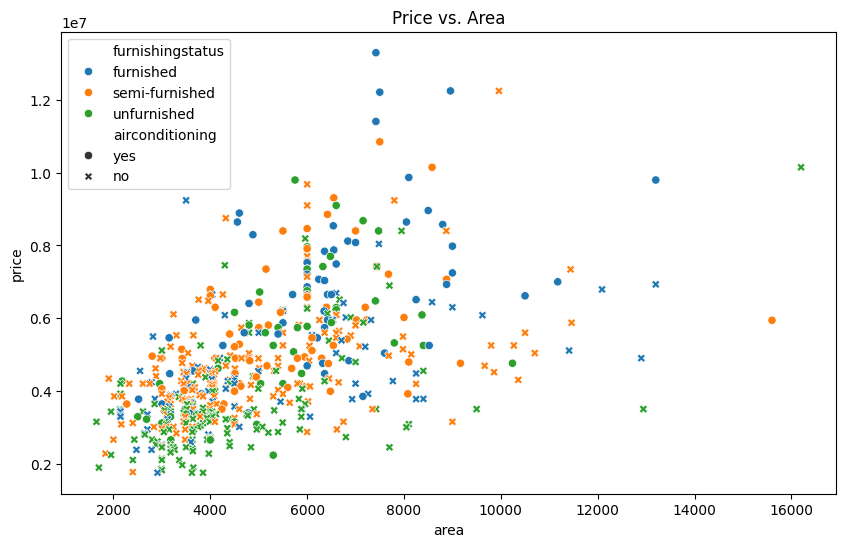

In [60]:
# Scatter plot for price vs. area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price', hue='furnishingstatus', style='airconditioning')
plt.title('Price vs. Area')
plt.show()

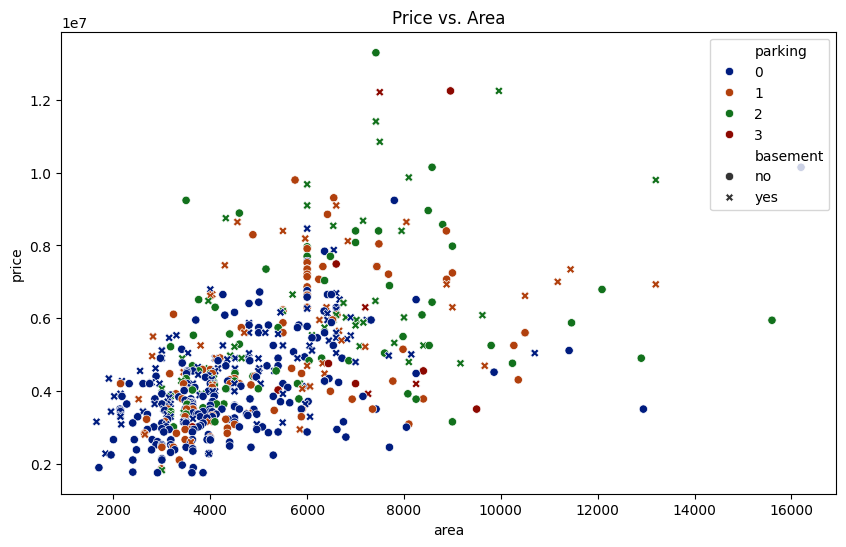

In [68]:
# Scatter plot for price vs. area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price', hue='parking',palette="dark", style='basement')
plt.title('Price vs. Area')
plt.show()

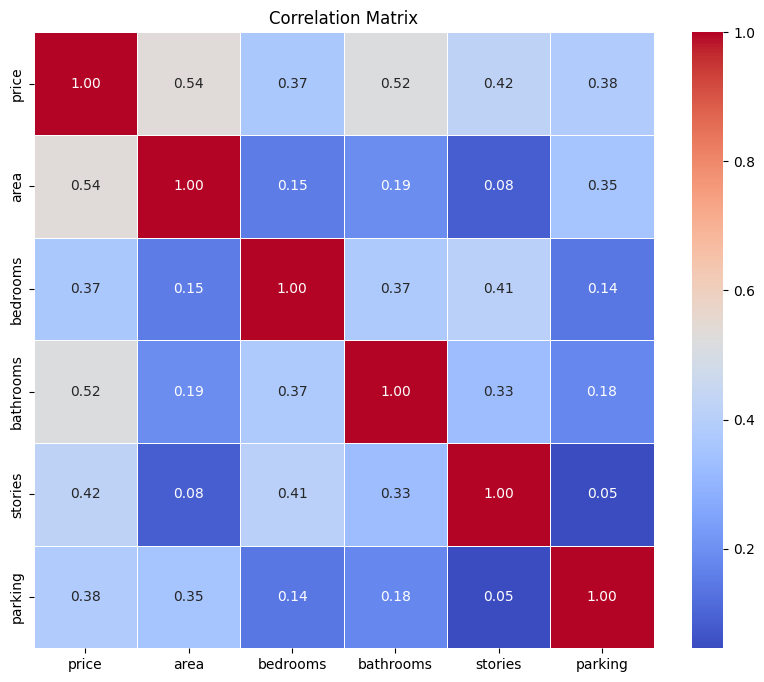

In [61]:
# 3. Correlation Matrix

# Calculate the correlation matrix

correlation_matrix = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

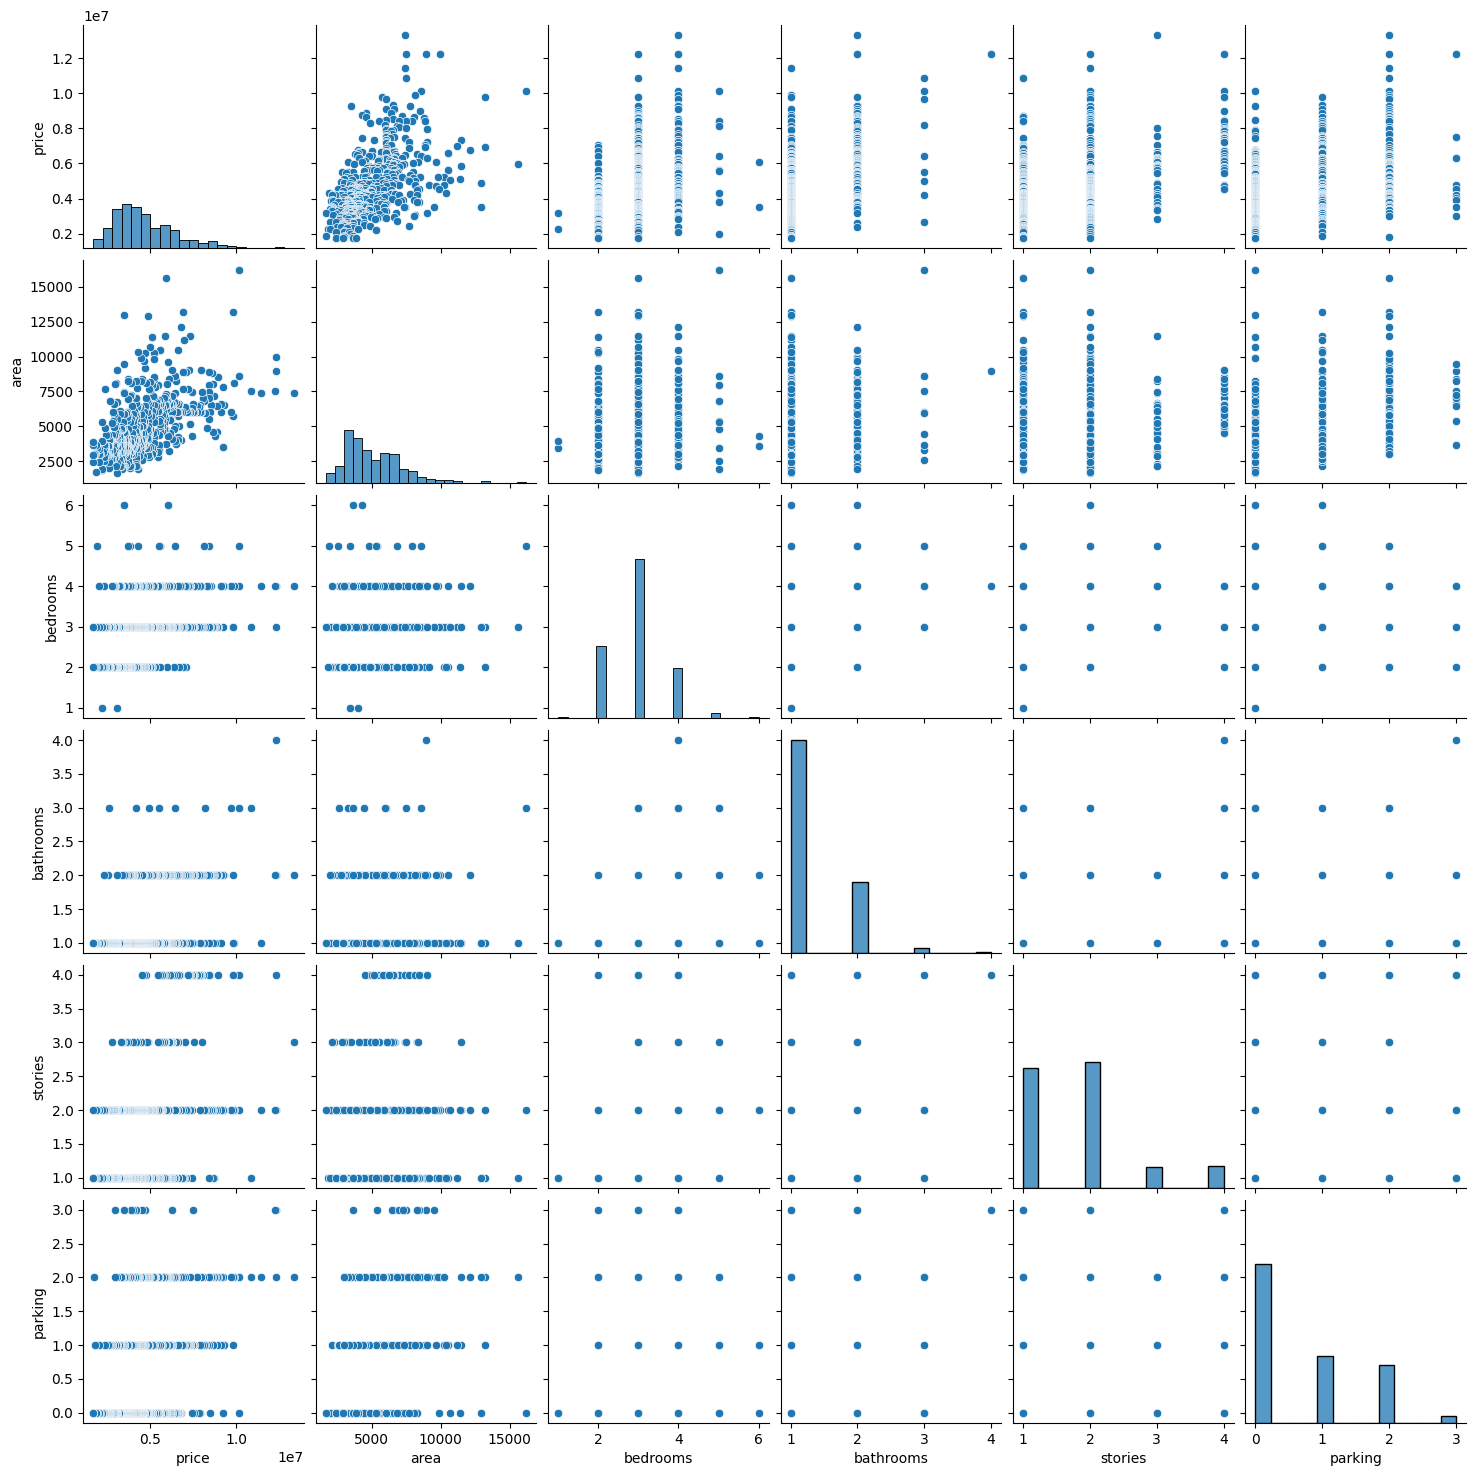

In [62]:
sns.pairplot(df)

In [ ]:
sns.barplot(x="stories",y="price",data=df,hue="furnishingstatus")

In [ ]:
sns.barplot(x="bedrooms",y="price",data=df,hue="furnishingstatus")

In [ ]:
# Function to plot box plot for a given column
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

# Plot box plot for the 'price' column
plot_boxplot(df, 'price')


# Plot box plot for the 'area' column
plot_boxplot(df, 'area')

In [ ]:
sns.barplot(x="bathrooms",y="price",data=df,hue="furnishingstatus")

In [ ]:

# Function to find outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find outliers in the 'price' column
outliers_price = find_outliers_iqr(df, 'price')
print("Outliers in 'price' column:")
print(outliers_price)

# Find outliers in the 'area' column
outliers_area = find_outliers_iqr(df, 'area')
print("\nOutliers in 'area' column:")
print(outliers_area)

In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to exclude outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Remove outliers from the 'price' column
df_no_outliers = remove_outliers(df, 'price')
print("DataFrame without outliers in 'price':")
print(df_no_outliers)

# Remove outliers from the 'area' column
df_no_outliers = remove_outliers(df_no_outliers, 'area')
print("\nDataFrame without outliers in 'area':")
print(df_no_outliers)

In [ ]:
plot_boxplot(df_no_outliers, 'price')


# Plot box plot for the 'area' column
plot_boxplot(df_no_outliers, 'area')

In [ ]:


import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Apply Label Encoding for Ordinal Data
# For simplicity, assume 'furnishingstatus' is ordinal with the following order:
# 'unfurnished' < 'semi-furnished' < 'furnished'

ordinal_columns = ['furnishingstatus']
ordinal_order = {'furnishingstatus': ['unfurnished', 'semi-furnished', 'furnished']}

label_encoders = {}
for col in ordinal_columns:
    le = LabelEncoder()
    le.fit(ordinal_order[col])
    df[col + '_encoded'] = le.transform(df[col])
    label_encoders[col] = le

# Step 2: Apply One-Hot Encoding for Nominal Data
nominal_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df_encoded = pd.get_dummies(df, columns=nominal_columns)

# Drop original categorical columns if desired
df_encoded = df_encoded.drop(columns=ordinal_columns)

print("DataFrame after Encoding:")
df_encoded.head()

In [ ]:
new_df=df_encoded.astype(int)

In [ ]:
new_df.head()

In [ ]:
sns.scatterplot(data=new_df,x="area",y="price",hue="bedrooms", palette="viridis")

In [ ]:
sns.scatterplot(data=new_df,x="area",y="price",hue="furnishingstatus_encoded", palette="viridis")

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Prepare the data
X = new_df[['area']]  # Feature matrix
y = new_df['price']   # Target vector

# Step 3: Optionally split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Step 5: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data points')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs. Area')
plt.legend()
plt.show()

In [ ]:

from sklearn.preprocessing import PolynomialFeatures


# Prepare the data
X = new_df.drop('price', axis=1)  # Feature matrix (all features except 'price')
y = new_df['price']               # Target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features into polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred = model.predict(X_test_poly)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display predictions
print("\nPredicted vs Actual Prices:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted}")

In [ ]:
new_df.head()

In [ ]:
# New sample data point for prediction
new_data = {
    'area': 5000,
    'bedrooms': 3,
    'bathrooms': 2,
    'stories': 2,
    'mainroad_no': 1,
    'guestroom': 0,
    'basement': 0,
    'hotwaterheating': 0,
    'airconditioning': 1,
    'parking': 1,
    'prefarea': 1,
    'furnishingstatus_encoded': 2
}

# Convert the sample data into a DataFrame
new_sample_df = pd.DataFrame([new_data])

# Transform the new sample data into polynomial features
new_sample_poly = poly.transform(new_sample_df)

# Predict the price using the trained polynomial regression model
predicted_price = model.predict(new_sample_poly)

print("Predicted Price for the new sample:", predicted_price[0])